In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=sns.load_dataset("titanic")
print(data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [4]:
print(len(data))
print(data.info())

891
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


survived
0    549
1    342
Name: count, dtype: int64


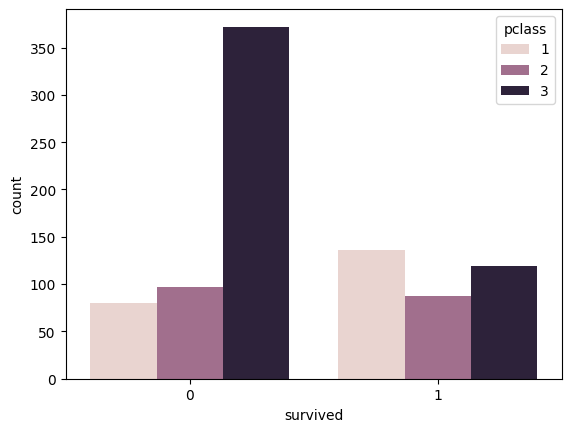

In [13]:
print(data['survived'].value_counts())
sns.countplot(x=data['survived'],hue=data['pclass'])
plt.show()


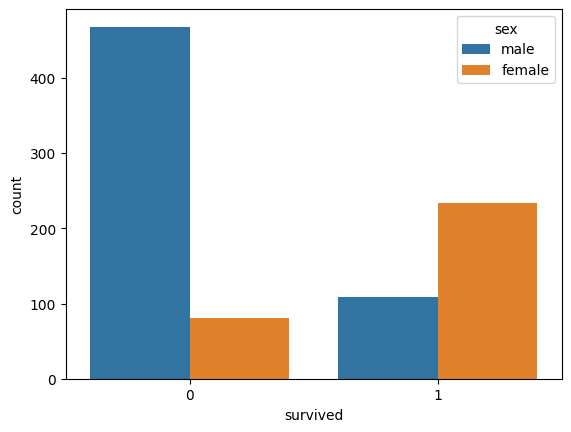

In [5]:
sns.countplot(x=data['survived'],hue=data['sex'])
plt.show()


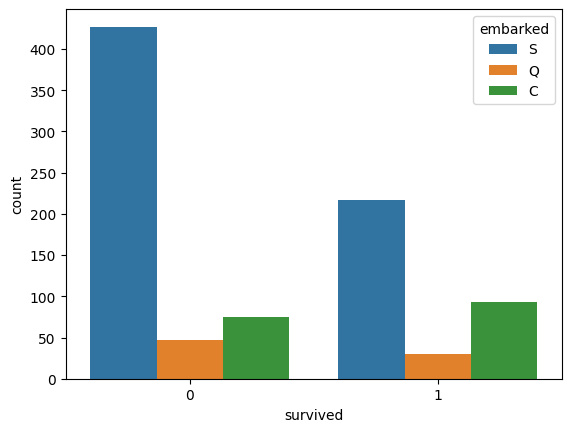

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [20]:
sns.countplot(x=data['survived'],hue=data['embarked'])
plt.show()
print(data.isnull().sum())

In [6]:
cols=['fare', 'class', 'who', 'adult_male', 'deck', 'embark_town','alive', 'alone']
data_new=data.drop(cols,axis=1)

In [7]:
print(data_new.head())
print(data_new.head())
print(data_new.isnull().sum())

   survived  pclass     sex   age  sibsp  parch embarked
0         0       3    male  22.0      1      0        S
1         1       1  female  38.0      1      0        C
2         1       3  female  26.0      0      0        S
3         1       1  female  35.0      1      0        S
4         0       3    male  35.0      0      0        S
   survived  pclass     sex   age  sibsp  parch embarked
0         0       3    male  22.0      1      0        S
1         1       1  female  38.0      1      0        C
2         1       3  female  26.0      0      0        S
3         1       1  female  35.0      1      0        S
4         0       3    male  35.0      0      0        S
survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
embarked      2
dtype: int64


In [8]:
mean_age=data_new['age'].mean()
print(mean_age)

29.69911764705882


In [9]:
mean_age=np.round(mean_age,2)
print(mean_age)

29.7


In [10]:
data_new['age']=data_new['age'].fillna(mean_age)
print(data_new.isnull().sum())

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
embarked    2
dtype: int64


In [12]:
data_new=data_new.dropna()
print(data_new.isnull().sum())


survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
embarked    0
dtype: int64


In [30]:
print(data_new.info())
print(data_new.head())

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  889 non-null    int64  
 1   pclass    889 non-null    int64  
 2   sex       889 non-null    int32  
 3   age       889 non-null    float64
 4   sibsp     889 non-null    int64  
 5   parch     889 non-null    int64  
 6   embarked  889 non-null    int32  
dtypes: float64(1), int32(2), int64(4)
memory usage: 48.6 KB
None
   survived  pclass  sex   age  sibsp  parch  embarked
0         0       3    1  22.0      1      0         2
1         1       1    0  38.0      1      0         0
2         1       3    0  26.0      0      0         2
3         1       1    0  35.0      1      0         2
4         0       3    1  35.0      0      0         2


In [14]:
###converting string to numeric
from sklearn.preprocessing import  LabelEncoder
enc=LabelEncoder()
data_new['sex']=enc.fit_transform(data_new['sex'])
data_new['embarked']=enc.fit_transform(data_new['embarked'])

In [15]:
print(data_new.head())


   survived  pclass  sex   age  sibsp  parch  embarked
0         0       3    1  22.0      1      0         2
1         1       1    0  38.0      1      0         0
2         1       3    0  26.0      0      0         2
3         1       1    0  35.0      1      0         2
4         0       3    1  35.0      0      0         2


In [16]:
#features-------X
x=np.array(data_new.iloc[:,1:])
print(x.shape) #alraedy in 2D

(889, 6)


In [17]:
y=np.array(data_new.iloc[:,0])
print(y.shape)

(889,)


In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=3)

In [19]:
print(pd.DataFrame(y).value_counts())
print(pd.DataFrame(ytrain).value_counts())

0    549
1    340
Name: count, dtype: int64
0    439
1    272
Name: count, dtype: int64


In [20]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3, p=2)
model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [22]:
ypred=model.predict(xtest)
print(ypred)
print(ytest)

[1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1
 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0]
[1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0
 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1
 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1
 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1
 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0]


In [23]:
count=0
for i in range(len(ytest)):
    if ypred[i]==ytest[i]:
        count=count+1

In [24]:
print(count)

137


In [25]:
from sklearn.metrics import accuracy_score
a=accuracy_score(ytest,ypred)

In [26]:
print(a)

0.7696629213483146
